# Vježbe 1 - drugi dio

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

## Linearna regresija

1. Vaš zadatak za zadaću: implementacija modela linearne regresije
2. Primjena tog modela na podatke uz dodarno korištenje različitih alata s kojima smo se upoznali

### Zadatak 1. Data exploatory analysis

Model linearne regresije primjenit ćemo na jednom skupu podataka. Prije toga, potrebno je učitati podatke, upoznati ih i analizirati. 

#### 1. Učitavanje podataka

In [17]:
data = pd.read_csv('./winequality-white.csv')
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### 2. Informacije o skupu podataka
Broj podataka, broj varijabli, tip podataka varijabli

In [ ]:
data.info()

In [ ]:
data.columns, data.dtypes

#### 3. Analiza svake varijable posebno
Ako je varijabla numerička - dobijemo relevantne kvantitativne mjere poput aritmetičke sredine, medijana i sl. 

Varijabla $quality$ unatoč tome što je numrička zapravo predstavlja ocjenu vina, a to je opet neka kategorija koja poprima vrijednosti $1-10$. <br>
Kod takvih varijabli je upitno koliko će nam ova analiza imati smisla. Ali možemo saznati neke stvari poput toga da je najmanja ocjena $3$, a najveća ocjena $9$. <br>


In [ ]:
data['alcohol'].describe()

In [ ]:
data['quality'].describe()

In [ ]:
data['type'].describe()

#### 4. Analiza svake varijable posebno - grafički
Prethodno izračunate kvantitativne mjere je često *zanimljivije* vidjeti na grafu - histogram

In [ ]:
sns.histplot(data['alcohol'])

In [ ]:
sns.histplot(data, x="quality")

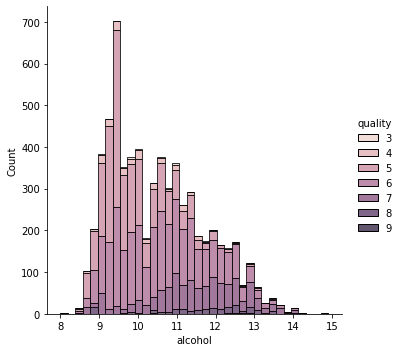

In [3]:
sns.displot(data,x="alcohol", hue="quality",multiple="stack")

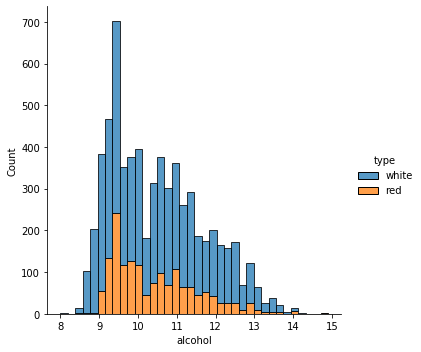

In [4]:
sns.displot(data,x="alcohol", hue="type",multiple="stack")

#### 5. Veza između numeričkih varijabli

Postoji li veza između količine alkohola u vinu i gustoće? Količine kiseline i ph-a? Za neke varijable očekujemo da su povezane. 

Grafički koristeći *scatter_plot* možemo to ispitati. 

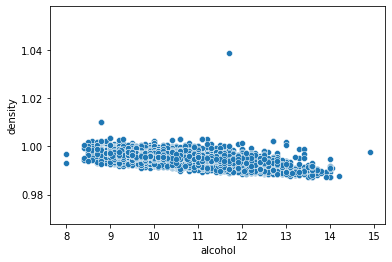

In [5]:
sns.scatterplot(data=data, x="alcohol", y="density")

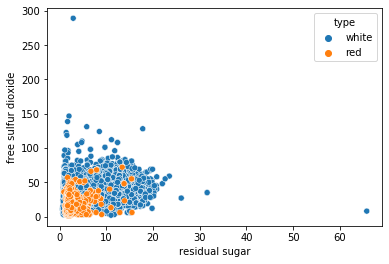

In [6]:
sns.scatterplot(data=data, x="residual sugar", y="free sulfur dioxide", hue="type")

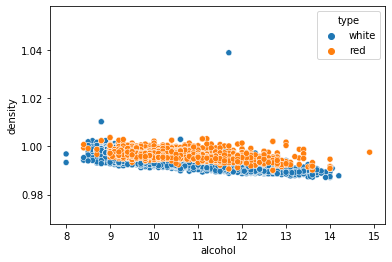

In [7]:
sns.scatterplot(data=data, x="alcohol", y="density", hue="type")

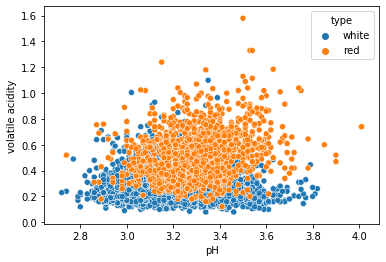

In [8]:
sns.scatterplot(data=data, x="pH", y="volatile acidity", hue="type")

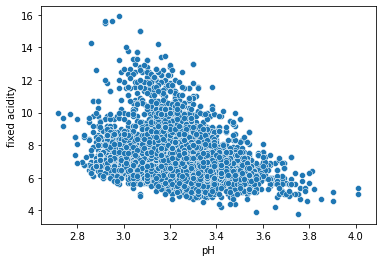

In [9]:
sns.scatterplot(data=data, x="pH", y="fixed acidity")

#### 6. Veza između svih varijabli

In [ ]:
sns.pairplot(data, hue='type', size=2.5);

#### 7. Histogrami - usporedba varijabli (kategorija)

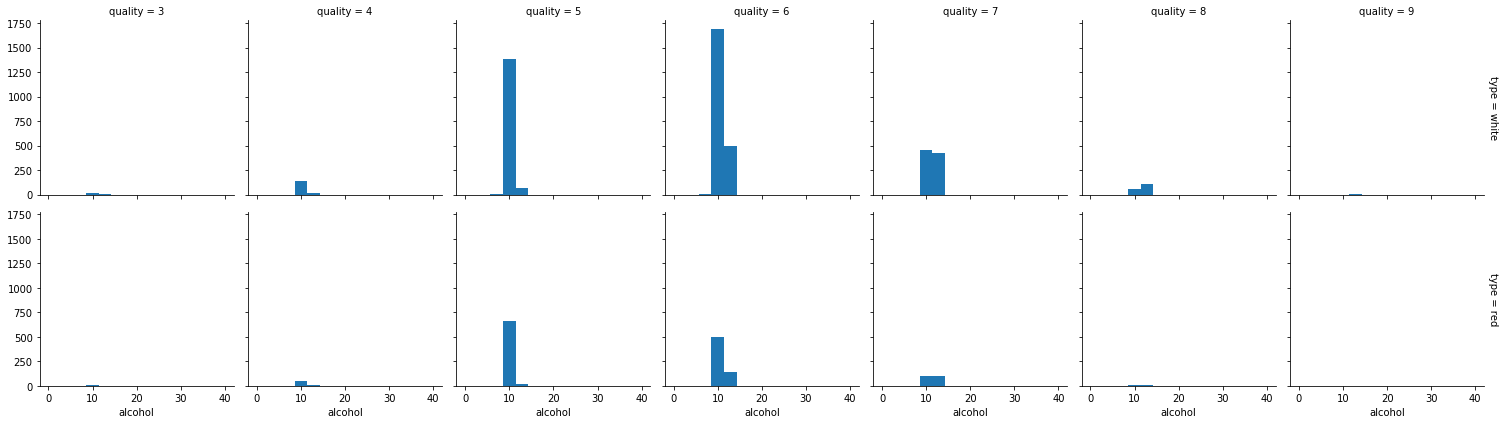

In [3]:
grid = sns.FacetGrid(data, row="type", col="quality", margin_titles=True)
grid.map(plt.hist, "alcohol", bins=np.linspace(0, 40, 15));

#### 8. Boxplot

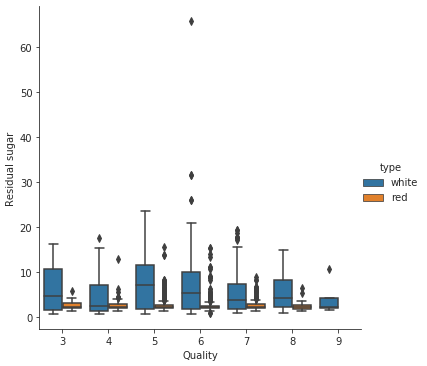

In [10]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="quality", y="residual sugar", hue="type", data=data, kind="box")
    g.set_axis_labels("Quality", "Residual sugar");

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.boxplot(x="type", y="residual sugar", data=data)

In [ ]:
sns.histplot(data[data["type"]=="white"],x="residual sugar")

In [ ]:
sns.histplot(data[data["type"]=="red"],x="residual sugar")

#### 9. Koreliranost podataka

Naredba dataframe.corr() računa Pearsonov koeficijent korelacije između varijabli. <br>
Prisjetimo se, za zadani par slučajnih varijabli $(X,Y)$ Pearsonov koeficijent korelacije definiramo kao 
$$ \rho_{x,y} = \frac{cov(X,Y)}{\sigma_X \cdot \sigma_Y},$$
gdje je $cov(X,Y)$ kovarijanca = $E[(X-E[X])\cdot(Y-E[Y])]$, a $\sigma_X$ je standardna devijacije slučajne varijable $X$,  $\sigma_X = \sqrt(Var(X))$, $Var(X)=E(X-EX)^2$. <br>
- Ako su $X,Y$ nezavisne, onda je Pearsonov koeficijent $\rho_{X,Y} = 0$
- ako je $Y=aX + b$ za neki koeficijent $a>0$ i neki $b$ onda je $\rho_{X,Y} =1$
- ako je $Y=aX + b$ za neki koeficijent $a<0$ i neki $b$ onda je $\rho_{X,Y} =-1$

In [ ]:
data.corr()

In [ ]:
sns.heatmap(data.corr())

## Zadatak 2: Priprema podataka

#### 1. 
Uočili smo snažnu koreliranost između varijebli $density$ i $alcohol$. Možemo li postaviti model linearne regresije koji ćemo naučiti da za zadanu vrijednost alkohola procijeni kolika je gustoća vina? Prvo nam trebaju podaci u toj formi. 

Ulazna varijabla $X$ je količina alkohola, a izlazna varijabla $y$ je gustoća. <br>


In [ ]:
X = data["alcohol"]
y = data["density"]

#### 2. 
Priprema podataka za treniranje: podjela, obrada
- uobičajeno je podatke s kojima radimo podijeliti na 2 ili 3 dijela
    - kasnije će biti nešto više o tome rečeno
    - za sada koristimo kao činjenicu da podatke želimo podijeliti na 2 dijela
    - jedan skup podataka (veći) nazvat ćemo trening skup, a drugi skup (manji) testni skup
    - podjela podataka može biti u omjeru npr. trening 70% - test 30% 
    - to možemo napraviti ručno: odabrati koje točno podatke gdje želimo ili nasumično staviti neke podatke 
    - osim toga možemo koristiti neke funkcije koje to rade
- najjednostavnije je korištenje gotovih funkcija iz scikit-learna
    - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html

In [ ]:
# Ručno odaberem
X_train, y_train = X.iloc[:4500], y.iloc[:4500]
X_test, y_test = X.iloc[4500:], y.iloc[4500:]

# Provjerimo
print(X_train.shape, X_test.shape)

# Nasumični odabir
X_train, y_train = X.sample(n=4500, random_state=123), y.sample(n=1400, random_state=123)
X_test, y_test = X.drop(X_train.index), y.drop(y_train.index)
print(X_train.shape, X_test.shape)


# Korištenje gotove funkcije
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)


# Uvijek želimo raditi s podacima koji su spremljeni u numpy array
print(type(X_train))
X_train, y_train, X_test, y_test = X_train.to_numpy().reshape(-1,1), y_train.to_numpy().reshape(-1,1), X_test.to_numpy().reshape(-1,1), y_test.to_numpy().reshape(-1,1)
print(type(X_train))


## Zadatak 3: Upoznavanje modela linearne regresije iz scikit-learna

Model linearne regresije je implementiran kao klasa. Prilikom instanciranja možemo postaviti sljedeće parametre:
- fit_intercept
    - bool
    - zadano je True
    - određuje treba li računati pomak ili ne
- normalize:
    - bool
    - zadano je False
    - ako je fit_intercept False, ovaj parametar se ignorira
    - ako je True, podaci su normalizirani tako da se oduzme aritmetička sredina i podijeli sa L2 normom
    
Nakon što smo postavili model imamo dostupne sljedeće metode
- fit(X, y) treniramo model
- predict(X) vraća predikciju za neki podatak na temelju natreniranih težina
- score(X,y) računa predikcije i uspoređuje sa stvarnim vrijednostima te vraća koeficijent (više na https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score)  

I atribute:
- coef_
- intercept_ 

#### 1. Postavljanje i učenje modela

In [ ]:
# Klasa
# LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
lr = LinearRegression(fit_intercept=False)
lr.fit(X_train,y_train)
lr.coef_, lr.intercept_

#### 2. Testiranje modela

In [ ]:
pogreška = 0
for i,prediction in enumerate(lr.predict(X_test)):
    pogreška += (prediction -  y_test[i])**2
print(pogreška/(2*X_test.shape[0]))


In [ ]:
# Razlikuje se od pogreske koju mi racunamo
# Dokumentacija: Return the coefficient of determination 
lr.score(X_test,y_test)

#### 3. Grafički prikaz rezultata modela
(Za vježbu)

In [ ]:
## Vaš kod ovdje